<a href="https://colab.research.google.com/github/min02choi/Data-Analysis-and-Applications/blob/master/Week4/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**판다스 (pandas)**는 파이썬의 데이터 분석 라이브러리입니다.

테이블 기반의 작업을 하기 때문에 엑셀과 비슷한 작업을 파이썬 코딩을 통해서 할 수 있다고 생각하시면 됩니다.

In [1]:
import pandas as pd
import numpy as np

from pandas import Series, DataFrame

Pandas에서는 데이터 테이블 객체를 가리켜 **DataFrame**이라고 하고,

각각의 열이나 행 데이터를 다루는 객체를 가리켜 **Series**라고 합니다.

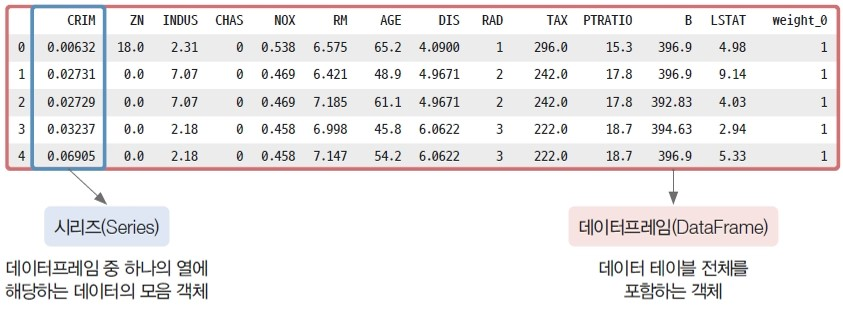

시리즈 (Series) 객체는 DataFrame 안에서 얻을 수도 있지만,

list, dict, ndarray 등과 같은 다양한 데이터 들이 Series 형태로 직접 변환될 수도 있습니다.

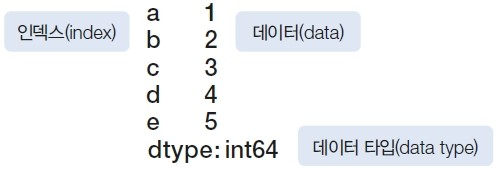

In [3]:
list_data = [1, 2, 3, 4, 5]
list_name = ["a", "b" ,"c" ,"d" ,"e"]

example_obj = Series(data=list_data, index=list_name)
example_obj

a    1
b    2
c    3
d    4
e    5
dtype: int64

이 예제는 문자열 리스트를 통해서 Series 개체를 생성해본 예제입니다.

**Series의 대표적인 속성**

* **데이터(data)** : 기존 다른 객체처럼 값을 저장하는 요소

* **인덱스(index)** : 일종의 데이터 위치를 가리키는 ID로 기본으로는 0부터 시작해서 차례로 할당. **문자열**도 할당 가능함.

* **데이터 타입(data type)** : 넘파이의 데이터 타입과 동일하게 사용

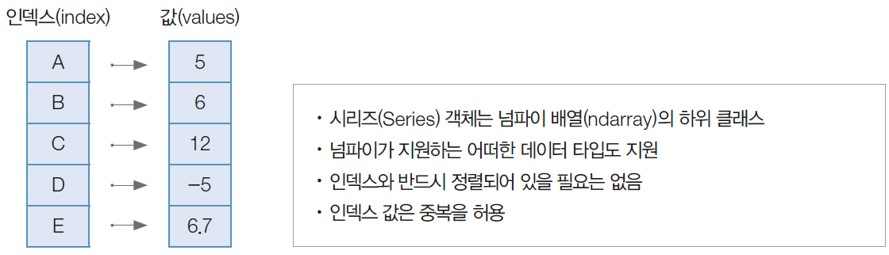

In [4]:
example_obj.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [5]:
example_obj.values

array([1, 2, 3, 4, 5])

In [6]:
example_obj.dtype

dtype('int64')

Series는 객체의 이름을 붙여줄 수 있으며,
또한 Index 자체의 이름을 붙여줄 수 있습니다.

In [7]:
example_obj.name = "number"
example_obj.index.name = "id"
example_obj

id
a    1
b    2
c    3
d    4
e    5
Name: number, dtype: int64

Series 객체 dict 로부터 생성 예

dict는 **key-value**쌍을 가지고 있으므로, **index-data**쌍으로 생성됩니다.

index 순서를 별도로 넣어줄수도 있습니다.

In [9]:
dict_data = { "a": 1, "b": 2, "c": 3, "d": 4, "e": 5 }
example_obj = Series(dict_data, dtype=np.float32, name="example_data")
example_obj

a    1.0
b    2.0
c    3.0
d    4.0
e    5.0
Name: example_data, dtype: float32

value값이 정의가 안되어있는 index (key) 값이 추가될 경우 NaN으로 초기화 됩니다.

In [10]:
dict_data_1 = { "a": 1, "b": 2, "c": 3, "d": 4, "e": 5 }
indexes = ["a", "b", "d", "c", "e", "f", "g", "h"]
series_obj_1 = Series(dict_data_1, index=indexes)
series_obj_1

a    1.0
b    2.0
d    4.0
c    3.0
e    5.0
f    NaN
g    NaN
h    NaN
dtype: float64

**DataFrame 객체**는 데이터를 표 형태로 관리하며, Numpy 배열의 특성을 그대로 가지고 있어서 다루기 편합니다.

열과 행 각각을 인덱싱 하여 하나의 데이터에 접근할 수 있습니다.

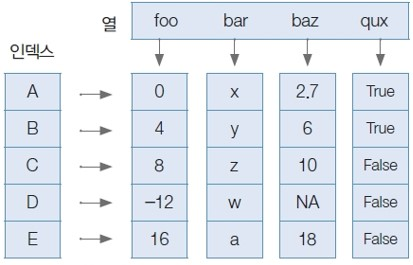


Pandas의 read_csv 함수는 csv파일을 읽어서 **DataFrame** 객체로 반환합니다.

Pandas내 유사한 기능의 함수로는 read_excel, read_json, read_sql 등이 있습니다.

In [11]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data' # 데이터 URL을 변수 data_url에 넣기
df_data = pd.read_csv(data_url, sep='\s+', header=None) # csv 데이터 로드
df_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_data, *[0], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_data, *[1], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_data, *[2], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_data, *[3], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_data, *[0], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_data, *[1], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_data, *[2], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_data, *[3], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_data, *[[[0, 1], [1, 2], [2, 3], [3, 4]]], **{})
chart

Dict 형을 이용하여, Key는 열이름 Value는 열을 구성하는 데이터 리스트를 넣어서 데이터프레임을 직접 생성할 수도 있습니다.

In [12]:
from pandas import Series, DataFrame

raw_data = {
      'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
      'last_name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'],
      'age': [42, 52, 36, 24, 73],
      'city': ['San Francisco', 'Baltimore', 'Miami', 'Douglas', 'Boston']
    }

df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'city'])
df

,first_name,last_name,age,city
0,Jason,Miller,42,San Francisco
1,Molly,Jacobson,52,Baltimore
2,Tina,Ali,36,Miami
3,Jake,Milner,24,Douglas
4,Amy,Cooze,73,Boston


Dict 변수에서 DataFrame을 만들고 싶은 열 데이터 만 골라서 만들 수 있습니다.

In [13]:
DataFrame(raw_data, columns = ["age", "city"])

,age,city
0,42,San Francisco
1,52,Baltimore
2,36,Miami
3,24,Douglas
4,73,Boston


Series 객체 생성시와 유사하게, 없는 데이터 열 이름을 추가할 경우 NaN 값으로 초기화 되어 생성이 됩니다.

In [15]:
DataFrame(raw_data, columns = ["first_name", "last_name", "age", "city", "debt"])

,first_name,last_name,age,city,debt
0,Jason,Miller,42,San Francisco,NaN
1,Molly,Jacobson,52,Baltimore,NaN
2,Tina,Ali,36,Miami,NaN
3,Jake,Milner,24,Douglas,NaN
4,Amy,Cooze,73,Boston,NaN


이번은 Pandas의 read_excel 명령어를 통해서 아래와 같은 엑셀 파일을 읽어보겠습니다.

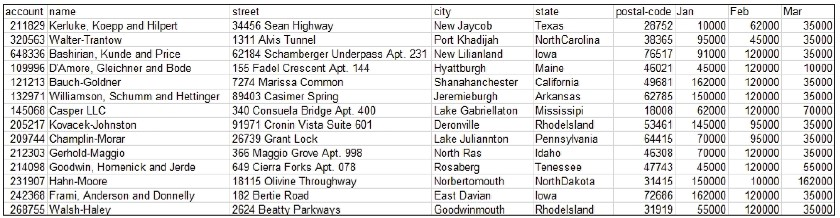

In [16]:
!gdown https://drive.google.com/uc?id=1hn3-bch4W9wvf0Wbf0vlF0Bomk1J9Um7
df = pd.read_excel("excel-comp-data.xlsx")
df

Downloading...
From: https://drive.google.com/uc?id=1hn3-bch4W9wvf0Wbf0vlF0Bomk1J9Um7
To: /content/excel-comp-data.xlsx
100% 12.0k/12.0k [00:00<00:00, 20.5MB/s]


,account,name,street,city,state,postal-code,Jan,Feb,Mar
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
1,320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah,NorthCarolina,38365,95000,45000,35000
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000
3,109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021,45000,120000,10000
4,121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681,162000,120000,35000
5,132971,"Williamson, Schumm and Hettinger",89403 Casimer Spring,Jeremieburgh,Arkansas,62785,150000,120000,35000
6,145068,Casper LLC,340 Consuela Bridge Apt. 400,Lake Gabriellaton,Mississipi,18008,62000,120000,70000
7,205217,Kovacek-Johnston,91971 Cronin Vista Suite 601,Deronville,RhodeIsland,53461,145000,95000,35000
8,209744,Champlin-Morar,26739 Grant Lock,Lake Juliannton,Pennsylvania,64415,70000,95000,35000
9,212303,Gerhold-Maggio,366 Maggio Grove Apt. 998,North Ras,Idaho,46308,70000,120000,35000


* head나 tail은 테이블의 첫 n개 행이나 마지막 n개 행을 구하고 싶을 때 사용합니다.

In [17]:
df.head(5)

,account,name,street,city,state,postal-code,Jan,Feb,Mar
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
1,320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah,NorthCarolina,38365,95000,45000,35000
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000
3,109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021,45000,120000,10000
4,121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681,162000,120000,35000


* numpy와 유사하게, 행과 열을 전치 (transpose)하려면 .T 를 사용하면 됩니다.
* head나 trail에 값을 넣지 않으면 기본값 5개가 사용됩니다.

In [18]:
df.tail().T

,10,11,12,13,14
account,214098,231907,242368,268755,273274
name,"Goodwin, Homenick and Jerde",Hahn-Moore,"Frami, Anderson and Donnelly",Walsh-Haley,McDermott PLC
street,649 Cierra Forks Apt. 078,18115 Olivine Throughway,182 Bertie Road,2624 Beatty Parkways,8917 Bergstrom Meadow
city,Rosaberg,Norbertomouth,East Davian,Goodwinmouth,Kathryneborough
state,Tenessee,NorthDakota,Iowa,RhodeIsland,Delaware
postal-code,47743,31415,72686,31919,27933
Jan,45000,150000,162000,55000,150000
Feb,120000,10000,120000,120000,120000
Mar,55000,162000,35000,35000,70000


* 열 이름을 리스트로 넣으면, 원하는 열만 출력할 수 있습니다.

In [19]:
df[["account", "street", "state"]].head(3)

,account,street,state
0,211829,34456 Sean Highway,Texas
1,320563,1311 Alvis Tunnel,NorthCarolina
2,648336,62184 Schamberger Underpass Apt. 231,Iowa


* 문자열 하나만 넣으면, Series 객체로 반환됩니다.

In [20]:
df["account"]

0     211829
1     320563
2     648336
3     109996
4     121213
5     132971
6     145068
7     205217
8     209744
9     212303
10    214098
11    231907
12    242368
13    268755
14    273274
Name: account, dtype: int64

* 문자열 리스트로 넣으면, DataFrame 객체로 반환됩니다.

In [21]:
df[["account"]]

,account
0,211829
1,320563
2,648336
3,109996
4,121213
5,132971
6,145068
7,205217
8,209744
9,212303


* Numpy 배열 슬라이싱 (Slicing) 방식을 이용하면 원하는 행을 뽑을 수 있습니다.

In [22]:
df[:3]

,account,name,street,city,state,postal-code,Jan,Feb,Mar
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
1,320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah,NorthCarolina,38365,95000,45000,35000
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000


* 위 열과 행을 추출하는 방법을 동시에 이용하면, DataFrame의 일정 부분을 사각형 형태로 잘라낼 수 있습니다.

In [23]:
df[["name", "street"]][:2]

,name,street
0,"Kerluke, Koepp and Hilpert",34456 Sean Highway
1,Walter-Trantow,1311 Alvis Tunnel


* loc 함수는 **index 이름**과 **열 이름**으로 데이터를 추출합니다..

In [24]:
df.loc[[0,2],["name","street"]]

,name,street
0,"Kerluke, Koepp and Hilpert",34456 Sean Highway
2,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231


* index는 기본적으로 0부터 시작해서 1씩 증가하지만, 필요에 따라 인덱스의 값을 우리가 원하는 값으로 변경해줄 수 있습니다.

In [25]:
df.index = df["account"]
df.head()

,account,name,street,city,state,postal-code,Jan,Feb,Mar
account,,,,,,,,,
211829,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
320563,320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah,NorthCarolina,38365,95000,45000,35000
648336,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000
109996,109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021,45000,120000,10000
121213,121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681,162000,120000,35000


* del 키워드를 이용하면 원하는 열 한개를 삭제할 수 있습니다.
* del로는 한개의 열만 삭제 가능하며 행이나 열을 삭제할 떄는 조금 후에 나올 drop이 더 일반적인 방법입니다.

In [26]:
del df["account"]
df.head()

,name,street,city,state,postal-code,Jan,Feb,Mar
account,,,,,,,,
211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah,NorthCarolina,38365,95000,45000,35000
648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000
109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021,45000,120000,10000
121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681,162000,120000,35000


* 이제 index가 새롭게 바뀌었으니 loc 함수를 이용해서 아까와 같은 값을 읽어보겠습니다.

In [27]:
df.loc[[211829, 648336],["name", "street"]]

,name,street
account,,
211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway
648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231


* slicing을 할경우 크기 순서가 아니라 값이 저장된 순서에 따라서 출력되는 것을 확인할 수 있습니다.

In [29]:
df.loc[320563:121213, ["name", "street"]]

,name,street
account,,
320563,Walter-Trantow,1311 Alvis Tunnel
648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231
109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144
121213,Bauch-Goldner,7274 Marissa Common


* iloc 함수는 **index location**의 약자로 index 이름이 아닌 index 위치로 호출하는 방법입니다. 저희가 익숙한 배열 index이라고 보시면 됩니다.

In [30]:
df.iloc[:10, :3]

,name,street,city
account,,,
211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob
320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah
648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland
109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh
121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester
132971,"Williamson, Schumm and Hettinger",89403 Casimer Spring,Jeremieburgh
145068,Casper LLC,340 Consuela Bridge Apt. 400,Lake Gabriellaton
205217,Kovacek-Johnston,91971 Cronin Vista Suite 601,Deronville
209744,Champlin-Morar,26739 Grant Lock,Lake Juliannton


* **sort_index** 함수는 index를 기준으로 정렬합니다.

In [31]:
df.sort_index()

,name,street,city,state,postal-code,Jan,Feb,Mar
account,,,,,,,,
109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021,45000,120000,10000
121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681,162000,120000,35000
132971,"Williamson, Schumm and Hettinger",89403 Casimer Spring,Jeremieburgh,Arkansas,62785,150000,120000,35000
145068,Casper LLC,340 Consuela Bridge Apt. 400,Lake Gabriellaton,Mississipi,18008,62000,120000,70000
205217,Kovacek-Johnston,91971 Cronin Vista Suite 601,Deronville,RhodeIsland,53461,145000,95000,35000
209744,Champlin-Morar,26739 Grant Lock,Lake Juliannton,Pennsylvania,64415,70000,95000,35000
211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
212303,Gerhold-Maggio,366 Maggio Grove Apt. 998,North Ras,Idaho,46308,70000,120000,35000
214098,"Goodwin, Homenick and Jerde",649 Cierra Forks Apt. 078,Rosaberg,Tenessee,47743,45000,120000,55000


* **sort_values** 함수는 값을 기준으로 정렬합니다.

In [32]:
df.sort_values(by='city')

,name,street,city,state,postal-code,Jan,Feb,Mar
account,,,,,,,,
205217,Kovacek-Johnston,91971 Cronin Vista Suite 601,Deronville,RhodeIsland,53461,145000,95000,35000
242368,"Frami, Anderson and Donnelly",182 Bertie Road,East Davian,Iowa,72686,162000,120000,35000
268755,Walsh-Haley,2624 Beatty Parkways,Goodwinmouth,RhodeIsland,31919,55000,120000,35000
109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021,45000,120000,10000
132971,"Williamson, Schumm and Hettinger",89403 Casimer Spring,Jeremieburgh,Arkansas,62785,150000,120000,35000
273274,McDermott PLC,8917 Bergstrom Meadow,Kathryneborough,Delaware,27933,150000,120000,70000
145068,Casper LLC,340 Consuela Bridge Apt. 400,Lake Gabriellaton,Mississipi,18008,62000,120000,70000
209744,Champlin-Morar,26739 Grant Lock,Lake Juliannton,Pennsylvania,64415,70000,95000,35000
211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000


* reset_index 는 다시 index를 기본으로 0부터 할당해주는 방법입니다.
* 이 때 index에 사용된 값은 없어지지 않고, 별도의 열 행으로 추가 됩니다.

In [33]:
df_new = df.reset_index()
df_new

,account,name,street,city,state,postal-code,Jan,Feb,Mar
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
1,320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah,NorthCarolina,38365,95000,45000,35000
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000
3,109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021,45000,120000,10000
4,121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681,162000,120000,35000
5,132971,"Williamson, Schumm and Hettinger",89403 Casimer Spring,Jeremieburgh,Arkansas,62785,150000,120000,35000
6,145068,Casper LLC,340 Consuela Bridge Apt. 400,Lake Gabriellaton,Mississipi,18008,62000,120000,70000
7,205217,Kovacek-Johnston,91971 Cronin Vista Suite 601,Deronville,RhodeIsland,53461,145000,95000,35000
8,209744,Champlin-Morar,26739 Grant Lock,Lake Juliannton,Pennsylvania,64415,70000,95000,35000
9,212303,Gerhold-Maggio,366 Maggio Grove Apt. 998,North Ras,Idaho,46308,70000,120000,35000


* drop 함수는 특정 열이나 행을 삭제한 객체를 반환합니다. 기본은 행을 삭제합니다.

아래는 index가 1인 행 (두번 째 행)을 삭제하고 반환한 DataFrame 객체입니다.

* 두 번 연속 실행시켜보세요. df_new 자체를 변환시키는게 아니라, 삭제한 객체를 반환합니다.

In [35]:
df_new.drop(1).head()

,account,name,street,city,state,postal-code,Jan,Feb,Mar
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000
3,109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021,45000,120000,10000
4,121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681,162000,120000,35000
5,132971,"Williamson, Schumm and Hettinger",89403 Casimer Spring,Jeremieburgh,Arkansas,62785,150000,120000,35000


* list를 사용하면 두 개 이상 제거 가능합니다.

In [36]:
df_drop = df_new.drop([1, 3])
df_new.head()

,account,name,street,city,state,postal-code,Jan,Feb,Mar
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
1,320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah,NorthCarolina,38365,95000,45000,35000
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000
3,109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021,45000,120000,10000
4,121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681,162000,120000,35000


In [37]:
df_drop.head()

,account,name,street,city,state,postal-code,Jan,Feb,Mar
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000
4,121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681,162000,120000,35000
5,132971,"Williamson, Schumm and Hettinger",89403 Casimer Spring,Jeremieburgh,Arkansas,62785,150000,120000,35000
6,145068,Casper LLC,340 Consuela Bridge Apt. 400,Lake Gabriellaton,Mississipi,18008,62000,120000,70000


* 직접 입력 값을 변화시키려면 **inplace** 매개 변수를 이용하면 됩니다.

In [38]:
df_new.drop(1, inplace=True)

* 열을 제거하고 싶을 땐, (1) 열 이름과 (2) 매개변수의 axis를 1로 전달해줍니다.

In [39]:
df_new.drop("account", axis=1)

,name,street,city,state,postal-code,Jan,Feb,Mar
0,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
2,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000
3,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021,45000,120000,10000
4,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681,162000,120000,35000
5,"Williamson, Schumm and Hettinger",89403 Casimer Spring,Jeremieburgh,Arkansas,62785,150000,120000,35000
6,Casper LLC,340 Consuela Bridge Apt. 400,Lake Gabriellaton,Mississipi,18008,62000,120000,70000
7,Kovacek-Johnston,91971 Cronin Vista Suite 601,Deronville,RhodeIsland,53461,145000,95000,35000
8,Champlin-Morar,26739 Grant Lock,Lake Juliannton,Pennsylvania,64415,70000,95000,35000
9,Gerhold-Maggio,366 Maggio Grove Apt. 998,North Ras,Idaho,46308,70000,120000,35000
10,"Goodwin, Homenick and Jerde",649 Cierra Forks Apt. 078,Rosaberg,Tenessee,47743,45000,120000,55000


In [40]:
df_new.drop(["account", "city"], axis=1)

,name,street,state,postal-code,Jan,Feb,Mar
0,"Kerluke, Koepp and Hilpert",34456 Sean Highway,Texas,28752,10000,62000,35000
2,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,Iowa,76517,91000,120000,35000
3,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Maine,46021,45000,120000,10000
4,Bauch-Goldner,7274 Marissa Common,California,49681,162000,120000,35000
5,"Williamson, Schumm and Hettinger",89403 Casimer Spring,Arkansas,62785,150000,120000,35000
6,Casper LLC,340 Consuela Bridge Apt. 400,Mississipi,18008,62000,120000,70000
7,Kovacek-Johnston,91971 Cronin Vista Suite 601,RhodeIsland,53461,145000,95000,35000
8,Champlin-Morar,26739 Grant Lock,Pennsylvania,64415,70000,95000,35000
9,Gerhold-Maggio,366 Maggio Grove Apt. 998,Idaho,46308,70000,120000,35000
10,"Goodwin, Homenick and Jerde",649 Cierra Forks Apt. 078,Tenessee,47743,45000,120000,55000


**groupby**는 데이터에서 동일한 개체를 가진 데이터를 추출해서 통계를 짓는 함수입니다.

예를 들어 A반 수학 점수의 원본 데이터(raw data)를 가지고 있을 때 해당 데이터에서
- 같은 성별을 가진 학생들의 평균 점수를 구하거나
- 50점 이상을 받은 학생의 수를 구하고자 할때 이용될 수 있습니다.

groupby 명령어는 분할 > 적용 >  결합 3가지 과정을 통해서 이루어집니다.

- **분할 (split)**: 같은 종류의 데이터끼리 나누는 기능
- **적용 (apply)**: 데이터 블록마다 sum, count, mean 등 연산 적용
- **결합 (combine)**: 연산 함수가 적용된 각 블록들을 합침

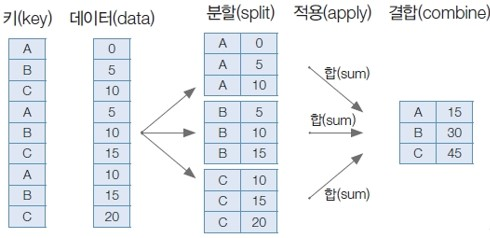


In [41]:
ipl_data = {
      'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings', 'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
      'Rank': [1, 2, 2, 3, 3, 4, 1, 1, 2, 4, 1, 2],
      'Year': [2014, 2015, 2014, 2014, 2014, 2015, 2016, 2017, 2016, 2014, 2015, 2017],
      'Points':[876, 789, 863, 673, 741, 812, 756, 788, 694, 701, 804, 690]
    }

df = pd.DataFrame(ipl_data)
df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2014,673
4,Kings,3,2014,741
5,kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


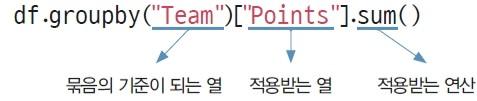

DataFrame을 **Team**열 값을 기준으로 묶으면서, **Point**열을 합계 집계 하는 예제입니다.

In [42]:
df.groupby("Team")["Points"].sum()   # team끼리 묶어서 point끼리의 sum을 구하라

Team
Devils    1536
Kings     2285
Riders    3049
Royals    1505
kings      812
Name: Points, dtype: int64

* 한 개 이상의 열을 기준으로 기준으로 삼을 경우, 계층적으로 묶어집니다.

아래의 예제에서는 1차 Team 단위, 2차 Year 단위로 묶고 중복된 것이 있으면 집계 (sum) 합니다.

데이터에서는 합쳐진 항목은 Devils - 2014 이며,

나머지는 각각 하나씩 존재하므로 그룹화만 되었습니다.

In [43]:
multi_groupby = df.groupby(["Team", "Year"])["Points"].sum()
multi_groupby

Team    Year
Devils  2014    1536
Kings   2014     741
        2016     756
        2017     788
Riders  2014     876
        2015     789
        2016     694
        2017     690
Royals  2014     701
        2015     804
kings   2015     812
Name: Points, dtype: int64

* 두 개 이상의 기준을 사용할 경우 multiple index 형태임을 알 수 있습니다.

In [44]:
multi_groupby = df.groupby(["Team", "Rank", "Year"])["Points"].sum()
multi_groupby.index

MultiIndex([('Devils', 2, 2014),
            ('Devils', 3, 2014),
            ( 'Kings', 1, 2016),
            ( 'Kings', 1, 2017),
            ( 'Kings', 3, 2014),
            ('Riders', 1, 2014),
            ('Riders', 2, 2015),
            ('Riders', 2, 2016),
            ('Riders', 2, 2017),
            ('Royals', 1, 2015),
            ('Royals', 4, 2014),
            ( 'kings', 4, 2015)],
           names=['Team', 'Rank', 'Year'])

In [45]:
multi_groupby["Devils":"Kings"]

Team    Rank  Year
Devils  2     2014    863
        3     2014    673
Kings   1     2016    756
              2017    788
        3     2014    741
Name: Points, dtype: int64

* 각 그룹의 수준별 집계 함수를 적용할 수 있습니다.

In [46]:
multi_groupby.groupby(level=0).sum()

Team
Devils    1536
Kings     2285
Riders    3049
Royals    1505
kings      812
Name: Points, dtype: int64

In [47]:
multi_groupby.groupby(level=1).sum()

Rank
1    3224
2    3036
3    1414
4    1513
Name: Points, dtype: int64

DataFrame을 **Team**열 값을 기준으로 묶기만 합니다.

In [48]:
grouped = df.groupby("Team")

Team열에 있던 Key 값으로 묶인 DataFrame 객체를 확인합니다.

In [49]:
grouped.get_group("Riders")

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
8,Riders,2,2016,694
11,Riders,2,2017,690


In [50]:
grouped.get_group("Kings")

,Team,Rank,Year,Points
4,Kings,3,2014,741
6,Kings,1,2016,756
7,Kings,1,2017,788


* 또는 그룹 끼리의 통계/집계 연산을 할 수 있습니다.

In [51]:
grouped.std()

,Rank,Year,Points
Team,,,
Devils,0.707107,0.000000,134.350288
Kings,1.154701,1.527525,24.006943
Riders,0.500000,1.290994,88.567771
Royals,2.121320,0.707107,72.831998
kings,NaN,NaN,NaN


**agg** 함수는 aggregation (집계)를 위한 함수입니다. min, np.mean 등 기존 함수를 적용할 수 있습니다.

In [52]:
grouped.agg(max)

,Rank,Year,Points
Team,,,
Devils,3,2014,863
Kings,3,2017,788
Riders,2,2017,876
Royals,4,2015,804
kings,4,2015,812


In [53]:
grouped.agg(np.mean)

,Rank,Year,Points
Team,,,
Devils,2.500000,2014.000000,768.000000
Kings,1.666667,2015.666667,761.666667
Riders,1.750000,2015.500000,762.250000
Royals,2.500000,2014.500000,752.500000
kings,4.000000,2015.000000,812.000000


In [54]:
grouped.agg({'Year': min, 'Rank': max})

,Year,Rank
Team,,
Devils,2014,3
Kings,2014,3
Riders,2014,2
Royals,2014,4
kings,2015,4


- **transformation** 함수는 agg와는 달리 개별 데이터의 정보 변환을 지원합니다.

- 단, GroupBy 객체에서는 그룹화된 정보를 사용합니다.

In [55]:
grouped.transform(max)

,Rank,Year,Points
0,2,2017,876
1,2,2017,876
2,3,2014,863
3,3,2014,863
4,3,2017,788
5,4,2015,812
6,3,2017,788
7,3,2017,788
8,2,2017,876
9,4,2015,804


In [56]:
def score(x):
  return x - x.mean()

grouped.transform(score)

,Rank,Year,Points
0,-0.750000,-1.500000,113.750000
1,0.250000,-0.500000,26.750000
2,-0.500000,0.000000,95.000000
3,0.500000,0.000000,-95.000000
4,1.333333,-1.666667,-20.666667
5,0.000000,0.000000,0.000000
6,-0.666667,0.333333,-5.666667
7,-0.666667,1.333333,26.333333
8,0.250000,0.500000,-68.250000
9,1.500000,-0.500000,-51.500000


In [57]:
score = lambda x: (x - x.mean())
grouped.transform(score)

,Rank,Year,Points
0,-0.750000,-1.500000,113.750000
1,0.250000,-0.500000,26.750000
2,-0.500000,0.000000,95.000000
3,0.500000,0.000000,-95.000000
4,1.333333,-1.666667,-20.666667
5,0.000000,0.000000,0.000000
6,-0.666667,0.333333,-5.666667
7,-0.666667,1.333333,26.333333
8,0.250000,0.500000,-68.250000
9,1.500000,-0.500000,-51.500000


* **filter** 함수를 통해 특정 조건으로 검색할 수 있습니다.

Team이 3개 이상 있는 Team만 출력하는 예제
* x는 분할된 상태에서 각각의 그룹화된 데이터프레임

In [58]:
df.groupby('Team').filter(
    lambda x: len(x) >= 3)

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
4,Kings,3,2014,741
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
11,Riders,2,2017,690


Team의 Point의 최대값이 800이 넘는 경우에만 출력하는 예제

In [59]:
df.groupby('Team').filter (
    lambda x:
    x["Points"].max() > 800)

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2014,673
5,kings,4,2015,812
8,Riders,2,2016,694
9,Royals,4,2014,701
10,Royals,1,2015,804
11,Riders,2,2017,690


* Merge (병합)은 두 개의 데이터를 특정한 기준을 가지고 하나로 통합하는 작업입니다.

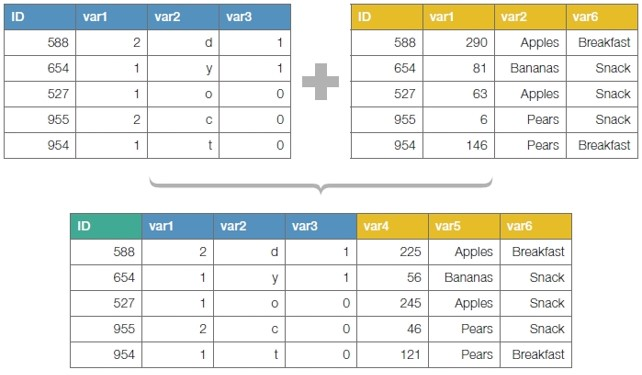

SQL 에서는 Merge (병합) 이라는 용어보다 Join (조인) 이라는 용어를 더 많이 사용합니다.

- **내부 조인 (Inner Join)**: 키 값을 기준으로 두 테이블에 모두 존재하는 키 값의 행끼리 병합
- **완전 조인 (Full Join)**: : 두 개의 테이블에서 각각의 행을 병합. 두 테이블에서 동일한 키 값을 가진 행은 통합하고, 두 테이블 중 하나라도 키 값이 존재하지 않는다면 존재하는 쪽의 데이터만 남겨둠

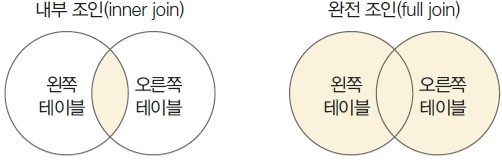


- **왼쪽 조인(Left Join)** : 왼쪽 테이블의 값을 기준으로 같은 키 값을 소유하고 있는 행을 병합하고, 오른쪽 테이블에 해당 키 값이 존재하지 않는다면 해당 행은 삭제
- **오른쪽 조인(Right Join)** : 오른쪽 테이블의 값을 기준으로 같은 키 값을 소유하고 있는 행을 병합하고, 왼쪽 테이블에 해당 키 값이 존재하지 않는다면 해당 행은 삭제

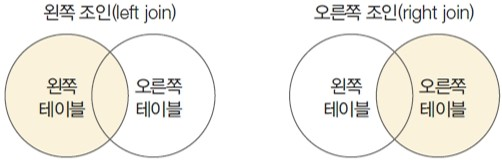

예제를 위해서 두개의 DataFrame을 생성합니다.

In [60]:
raw_data = {
      'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
      'test_score': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]
    }

df_left = pd.DataFrame(raw_data, columns=['subject_id', 'test_score'])
df_left

,subject_id,test_score
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


In [61]:
raw_data = {
      'subject_id': ['4', '5', '6', '7', '8'],
      'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
      'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']
    }

df_right = pd.DataFrame(raw_data, columns=['subject_id', 'first_name', 'last_name'])
df_right

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


* inner (내부) join은 가장 기본적인 join으로 양쪽의 공통적인 데이터를 통합합니다. 집합에서 교집합으로 생각하면 됩니다.
* 아래의 예제는 **subject_id** 열을 기준으로 교집합을 만듭니다.
* **left, right** 매개변수에 각 위치에 해당하는 DataFrame 객체를 입력
* **how** 매개변수에 inner를 입력,**on** 매개변수에 병합의 기준이 되는 열 입력

In [62]:
pd.merge(left=df_left, right=df_right, how="inner", on='subject_id')

,subject_id,test_score,first_name,last_name
0,4,61,Billy,Bonder
1,5,16,Brian,Black
2,7,14,Bryce,Brice
3,8,15,Betty,Btisan


- **Left Join**: 왼쪽 테이블을 기준으로 데이터를 병합 오른쪽 테이블에 왼쪽 테이블에 있는 키 값이 존재하지 않는다면 NaN으로 출력 (how 매개변수에 left)

- **Right Join**: 오른쪽 테이블 기준으로 데이터를 병합(how 매개변수에 right)

In [63]:
pd.merge(
    df_left, df_right,
    on='subject_id', how='left')

,subject_id,test_score,first_name,last_name
0,1,51,NaN,NaN
1,2,15,NaN,NaN
2,3,15,NaN,NaN
3,4,61,Billy,Bonder
4,5,16,Brian,Black
5,7,14,Bryce,Brice
6,8,15,Betty,Btisan
7,9,1,NaN,NaN
8,10,61,NaN,NaN
9,11,16,NaN,NaN


In [64]:
pd.merge(
    df_left, df_right,
    on='subject_id', how='right')

,subject_id,test_score,first_name,last_name
0,4,61.0,Billy,Bonder
1,5,16.0,Brian,Black
2,6,NaN,Bran,Balwner
3,7,14.0,Bryce,Brice
4,8,15.0,Betty,Btisan


* **Outer Join (완전 조인)**은 양쪽에 같은 키 값이 있는 데이터는 합치고 값이 없는 부분은 NaN으로 출력합니다. (합집합)

In [65]:
pd.merge(df_left, df_right, on='subject_id', how='outer')

,subject_id,test_score,first_name,last_name
0,1,51.0,NaN,NaN
1,2,15.0,NaN,NaN
2,3,15.0,NaN,NaN
3,4,61.0,Billy,Bonder
4,5,16.0,Brian,Black
5,7,14.0,Bryce,Brice
6,8,15.0,Betty,Btisan
7,9,1.0,NaN,NaN
8,10,61.0,NaN,NaN
9,11,16.0,NaN,NaN


* Concatenate (연결)은 두 테이블을 그대로 붙이는 작업입니다.
* 데이터의 스키마가 동일할 때 그대로 연결할 수 있습니다.
* 주로 세로로 연결하는데 사용합니다.

다음 예제를 위한 다운로드

In [66]:
!gdown https://drive.google.com/uc?id=10mll4FbGam0Fww4Ev20aKKjizUhsenwi
!gdown https://drive.google.com/uc?id=1FbmdQMhKJyRSHM6AR-25IYZ1f9Hchfu2
!gdown https://drive.google.com/uc?id=16_KOmfV3ZsViWP51AePmfwOuUk-FfhOa

Downloading...
From: https://drive.google.com/uc?id=10mll4FbGam0Fww4Ev20aKKjizUhsenwi
To: /content/sales-mar-2014.xlsx
100% 12.1k/12.1k [00:00<00:00, 33.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1FbmdQMhKJyRSHM6AR-25IYZ1f9Hchfu2
To: /content/sales-jan-2014.xlsx
100% 11.8k/11.8k [00:00<00:00, 31.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=16_KOmfV3ZsViWP51AePmfwOuUk-FfhOa
To: /content/sales-feb-2014.xlsx
100% 10.6k/10.6k [00:00<00:00, 29.8MB/s]


In [67]:
import os
filenames = [os.path.join("./", filename)
             for filename in os.listdir(".") if "sales" in filename]
print(filenames)

['./sales-feb-2014.xlsx', './sales-jan-2014.xlsx', './sales-mar-2014.xlsx']


In [68]:
df_list = [pd.read_excel(filename) for filename in filenames]
for df in df_list:
    print(type(df), len(df))

<class 'pandas.core.frame.DataFrame'> 108
<class 'pandas.core.frame.DataFrame'> 134
<class 'pandas.core.frame.DataFrame'> 142


- axis=0으로 세로로 연결

In [69]:
df_list[0]

,account number,name,sku,quantity,unit price,ext price,date
0,383080,Will LLC,B1-20000,7,33.69,235.83,2014-02-01 09:04:59
1,412290,Jerde-Hilpert,S1-27722,11,21.12,232.32,2014-02-01 11:51:46
2,412290,Jerde-Hilpert,B1-86481,3,35.99,107.97,2014-02-01 17:24:32
3,412290,Jerde-Hilpert,B1-20000,23,78.90,1814.70,2014-02-01 19:56:48
4,672390,Kuhn-Gusikowski,S1-06532,48,55.82,2679.36,2014-02-02 03:45:20
...,...,...,...,...,...,...,...
103,740150,Barton LLC,S1-30248,21,14.05,295.05,2014-02-28 02:29:03
104,218895,Kulas Inc,B1-69924,44,72.43,3186.92,2014-02-28 08:42:56
105,383080,Will LLC,B1-53102,6,32.80,196.80,2014-02-28 17:35:23
106,688981,Keeling LLC,S2-23246,18,64.71,1164.78,2014-02-28 23:21:04


In [70]:
df_list[1]

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55
...,...,...,...,...,...,...,...
129,383080,Will LLC,S2-11481,17,67.71,1151.07,2014-01-30 23:25:46
130,737550,"Fritsch, Russel and Anderson",S1-50961,1,34.81,34.81,2014-01-30 23:56:20
131,146832,Kiehn-Spinka,B1-53636,33,93.07,3071.31,2014-01-31 02:53:16
132,729833,Koepp Ltd,S2-16558,24,27.12,650.88,2014-01-31 19:43:49


In [71]:
df_list[2]

,account number,name,sku,quantity,unit price,ext price,date
0,163416,Purdy-Kunde,S1-30248,19,65.03,1235.57,2014-03-01 16:07:40
1,527099,Sanford and Sons,S2-82423,3,76.21,228.63,2014-03-01 17:18:01
2,527099,Sanford and Sons,B1-50809,8,70.78,566.24,2014-03-01 18:53:09
3,737550,"Fritsch, Russel and Anderson",B1-50809,20,50.11,1002.20,2014-03-01 23:47:17
4,688981,Keeling LLC,B1-86481,-1,97.16,-97.16,2014-03-02 01:46:44
...,...,...,...,...,...,...,...
137,737550,"Fritsch, Russel and Anderson",B1-65551,12,56.24,674.88,2014-03-31 08:43:24
138,642753,Pollich LLC,S1-93683,21,92.57,1943.97,2014-03-31 11:37:34
139,412290,Jerde-Hilpert,B1-20000,30,22.38,671.40,2014-03-31 21:41:31
140,307599,"Kassulke, Ondricka and Metz",S2-16558,46,56.04,2577.84,2014-03-31 22:11:22


In [ ]:
df = pd.concat(df_list, axis=0)
df

,account number,name,sku,quantity,unit price,ext price,date
0,383080,Will LLC,B1-20000,7,33.69,235.83,2014-02-01 09:04:59
1,412290,Jerde-Hilpert,S1-27722,11,21.12,232.32,2014-02-01 11:51:46
2,412290,Jerde-Hilpert,B1-86481,3,35.99,107.97,2014-02-01 17:24:32
3,412290,Jerde-Hilpert,B1-20000,23,78.90,1814.70,2014-02-01 19:56:48
4,672390,Kuhn-Gusikowski,S1-06532,48,55.82,2679.36,2014-02-02 03:45:20
...,...,...,...,...,...,...,...
137,737550,"Fritsch, Russel and Anderson",B1-65551,12,56.24,674.88,2014-03-31 08:43:24
138,642753,Pollich LLC,S1-93683,21,92.57,1943.97,2014-03-31 11:37:34
139,412290,Jerde-Hilpert,B1-20000,30,22.38,671.40,2014-03-31 21:41:31
140,307599,"Kassulke, Ondricka and Metz",S2-16558,46,56.04,2577.84,2014-03-31 22:11:22


In [ ]:
df =  pd.concat([df_list[0], df_list[1]])
df

,account number,name,sku,quantity,unit price,ext price,date
0,383080,Will LLC,B1-20000,7,33.69,235.83,2014-02-01 09:04:59
1,412290,Jerde-Hilpert,S1-27722,11,21.12,232.32,2014-02-01 11:51:46
2,412290,Jerde-Hilpert,B1-86481,3,35.99,107.97,2014-02-01 17:24:32
3,412290,Jerde-Hilpert,B1-20000,23,78.90,1814.70,2014-02-01 19:56:48
4,672390,Kuhn-Gusikowski,S1-06532,48,55.82,2679.36,2014-02-02 03:45:20
...,...,...,...,...,...,...,...
129,383080,Will LLC,S2-11481,17,67.71,1151.07,2014-01-30 23:25:46
130,737550,"Fritsch, Russel and Anderson",S1-50961,1,34.81,34.81,2014-01-30 23:56:20
131,146832,Kiehn-Spinka,B1-53636,33,93.07,3071.31,2014-01-31 02:53:16
132,729833,Koepp Ltd,S2-16558,24,27.12,650.88,2014-01-31 19:43:49
